In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading dataset
data=pd.read_csv(r".../movie_metadata.csv")
print(data)

                 color       director_name  num_critic_for_reviews  duration  \
0                Color       James Cameron                   723.0     178.0   
1                Color      Gore Verbinski                   302.0     169.0   
2                Color          Sam Mendes                   602.0     148.0   
3                Color   Christopher Nolan                   813.0     164.0   
4                  NaN         Doug Walker                     NaN       NaN   
5                Color      Andrew Stanton                   462.0     132.0   
6                Color           Sam Raimi                   392.0     156.0   
7                Color        Nathan Greno                   324.0     100.0   
8                Color         Joss Whedon                   635.0     141.0   
9                Color         David Yates                   375.0     153.0   
10               Color         Zack Snyder                   673.0     183.0   
11               Color        Bryan Sing

In [3]:
data.shape

(5043, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
data.describe(include = ['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,King Kong,Steve Coogan,based on novel,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [7]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


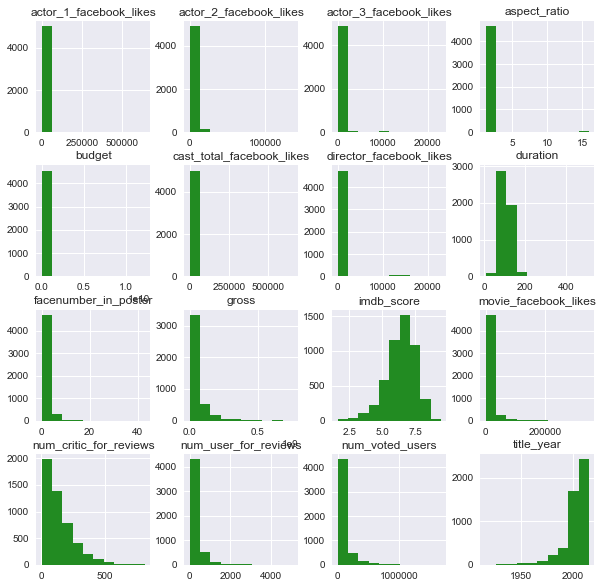

In [8]:
plt.style.use('seaborn')
data.hist(figsize=[10,10],color="forestgreen")
plt.show()

###### Removing duplicate movie titles

In [9]:
mov_ttl_dup=data.duplicated(subset='movie_title', keep=False)

In [10]:
sum(mov_ttl_dup)

245

In [11]:
data=pd.read_csv(r".../movie_metadata.csv").drop_duplicates(subset='movie_title', keep='first')


In [12]:
data.shape

(4917, 28)

###### Missing values

In [13]:
data_miss=data.isnull().sum().to_frame('NaN_Count')

In [14]:
data.isnull().sum().sort_values(ascending=False)

gross                        863
budget                       484
aspect_ratio                 326
content_rating               300
plot_keywords                152
title_year                   106
director_name                102
director_facebook_likes      102
num_critic_for_reviews        49
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
movie_facebook_likes           0
genres                         0
movie_title                    0
num_voted_users                0
movie_imdb_link                0
imdb_score                     0
cast_total_facebook_likes      0
dtype: int64

In [15]:
#Number of missing values per column
data_miss

,NaN_Count
color,19
director_name,102
num_critic_for_reviews,49
duration,15
director_facebook_likes,102
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,863
genres,0


In [16]:
#Imputing by median for continuous variables
median=data[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','num_user_for_reviews','gross','budget','actor_2_facebook_likes','movie_facebook_likes']].median()
data=data.fillna(median)

In [17]:
#Imputing by mode for categorical variables
mode=data[['color','duration','facenumber_in_poster','language','country','content_rating','title_year','aspect_ratio']].mode().iloc[0]
data=data.fillna(mode)

In [18]:
data_miss2=data.isnull().sum().to_frame('NaN_Count')

In [19]:
#Number of unique values
data.nunique()

color                           2
director_name                2397
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3030
actor_1_facebook_likes        877
gross                        4034
genres                        914
actor_1_name                 2095
movie_title                  4917
num_voted_users              4751
cast_total_facebook_likes    3960
actor_3_name                 3519
facenumber_in_poster           19
plot_keywords                4757
movie_imdb_link              4917
num_user_for_reviews          955
language                       47
country                        65
content_rating                 18
budget                        438
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

###### converting float values into int values

In [20]:
data[['budget','gross','num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','actor_2_facebook_likes']]=data[['budget','gross','num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','actor_2_facebook_likes']].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4917 entries, 0 to 5042
Data columns (total 28 columns):
color                        4917 non-null object
director_name                4815 non-null object
num_critic_for_reviews       4917 non-null int32
duration                     4917 non-null float64
director_facebook_likes      4917 non-null int32
actor_3_facebook_likes       4917 non-null int32
actor_2_name                 4904 non-null object
actor_1_facebook_likes       4917 non-null int32
gross                        4917 non-null int32
genres                       4917 non-null object
actor_1_name                 4910 non-null object
movie_title                  4917 non-null object
num_voted_users              4917 non-null int64
cast_total_facebook_likes    4917 non-null int64
actor_3_name                 4894 non-null object
facenumber_in_poster         4917 non-null int32
plot_keywords                4765 non-null object
movie_imdb_link              4917 non-null object


###### Dropping missing values

In [22]:
data_final=data.dropna()
data=data_final

In [23]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178.0,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169.0,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148.0,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164.0,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
5,Color,Andrew Stanton,462,132.0,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000
6,Color,Sam Raimi,392,156.0,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,...,1902,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0
7,Color,Nathan Greno,324,100.0,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387,English,USA,PG,260000000,2010,553,7.8,1.85,29000
8,Color,Joss Whedon,635,141.0,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,...,1117,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000
9,Color,David Yates,375,153.0,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,...,973,English,UK,PG,250000000,2009,11000,7.5,2.35,10000
10,Color,Zack Snyder,673,183.0,0,2000,Lauren Cohan,15000,330249062,Action|Adventure|Sci-Fi,...,3018,English,USA,PG-13,250000000,2016,4000,6.9,2.35,197000


In [24]:
data.shape

(4658, 28)

## Exploratory Data Analysis

#### Correlation Matrix

In [25]:
cor=data.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')#Higher Pearson Coefficient i.e. high correlation is given by dark red color

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1,0.24266,0.183924,0.261568,0.186902,0.473268,0.618429,0.25661,-0.0277602,0.596111,0.228522,0.306789,0.273171,0.335823,0.0327654,0.690186
duration,0.24266,1,0.176697,0.126979,0.0834215,0.240112,0.336653,0.119104,0.0294528,0.344186,0.143944,-0.132806,0.132516,0.352561,0.0503984,0.214994
director_facebook_likes,0.183924,0.176697,1,0.120144,0.093072,0.141798,0.301967,0.120899,-0.0406257,0.226951,0.0392091,-0.0638299,0.117062,0.18036,0.00110295,0.164565
actor_3_facebook_likes,0.261568,0.126979,0.120144,1,0.251102,0.291906,0.274316,0.472386,0.104018,0.222,0.134349,0.101417,0.547922,0.0592276,0.0147286,0.269684
actor_1_facebook_likes,0.186902,0.0834215,0.093072,0.251102,1,0.150225,0.190275,0.951598,0.0711813,0.143587,0.0853214,0.0928596,0.395835,0.0779813,0.0146056,0.132809
gross,0.473268,0.240112,0.141798,0.291906,0.150225,1,0.635593,0.234462,-0.0236538,0.56036,0.318438,0.0461771,0.254294,0.18763,0.0168428,0.371436
num_voted_users,0.618429,0.336653,0.301967,0.274316,0.190275,0.635593,1,0.25801,-0.0267794,0.799107,0.200801,0.0200443,0.2576,0.435065,0.0121536,0.535368
cast_total_facebook_likes,0.25661,0.119104,0.120899,0.472386,0.951598,0.234462,0.25801,1,0.0914912,0.201509,0.123126,0.118391,0.633052,0.0895097,0.018799,0.204031
facenumber_in_poster,-0.0277602,0.0294528,-0.0406257,0.104018,0.0711813,-0.0236538,-0.0267794,0.0914912,1,-0.0660276,0.00207786,0.0572491,0.0750041,-0.0639586,0.00764783,0.00564534
num_user_for_reviews,0.596111,0.344186,0.226951,0.222,0.143587,0.56036,0.799107,0.201509,-0.0660276,1,0.211711,0.0117129,0.210328,0.311642,0.00868528,0.40217


It is observed that "cast_total_facebook_likes" and "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes" are highly correlated.Hence, it is proposed to consider any one of the variable i.e."actor_1_facebook_likes".
Also, 41% of those users who voted have reviewed the movies (critics) due to moderate correlation between voters & reviewers.

In [26]:
#Dropping irrelevant columns
moddata=data.drop(data.columns[[0,1,5,6,9,10,11,13,14,15,16,17,19,20,21,23,24,26]], axis=1)

In [27]:
newdata=data[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes',
                  'actor_1_facebook_likes','imdb_score','num_critic_for_reviews','num_user_for_reviews','num_voted_users']]

#### ScatterPlot

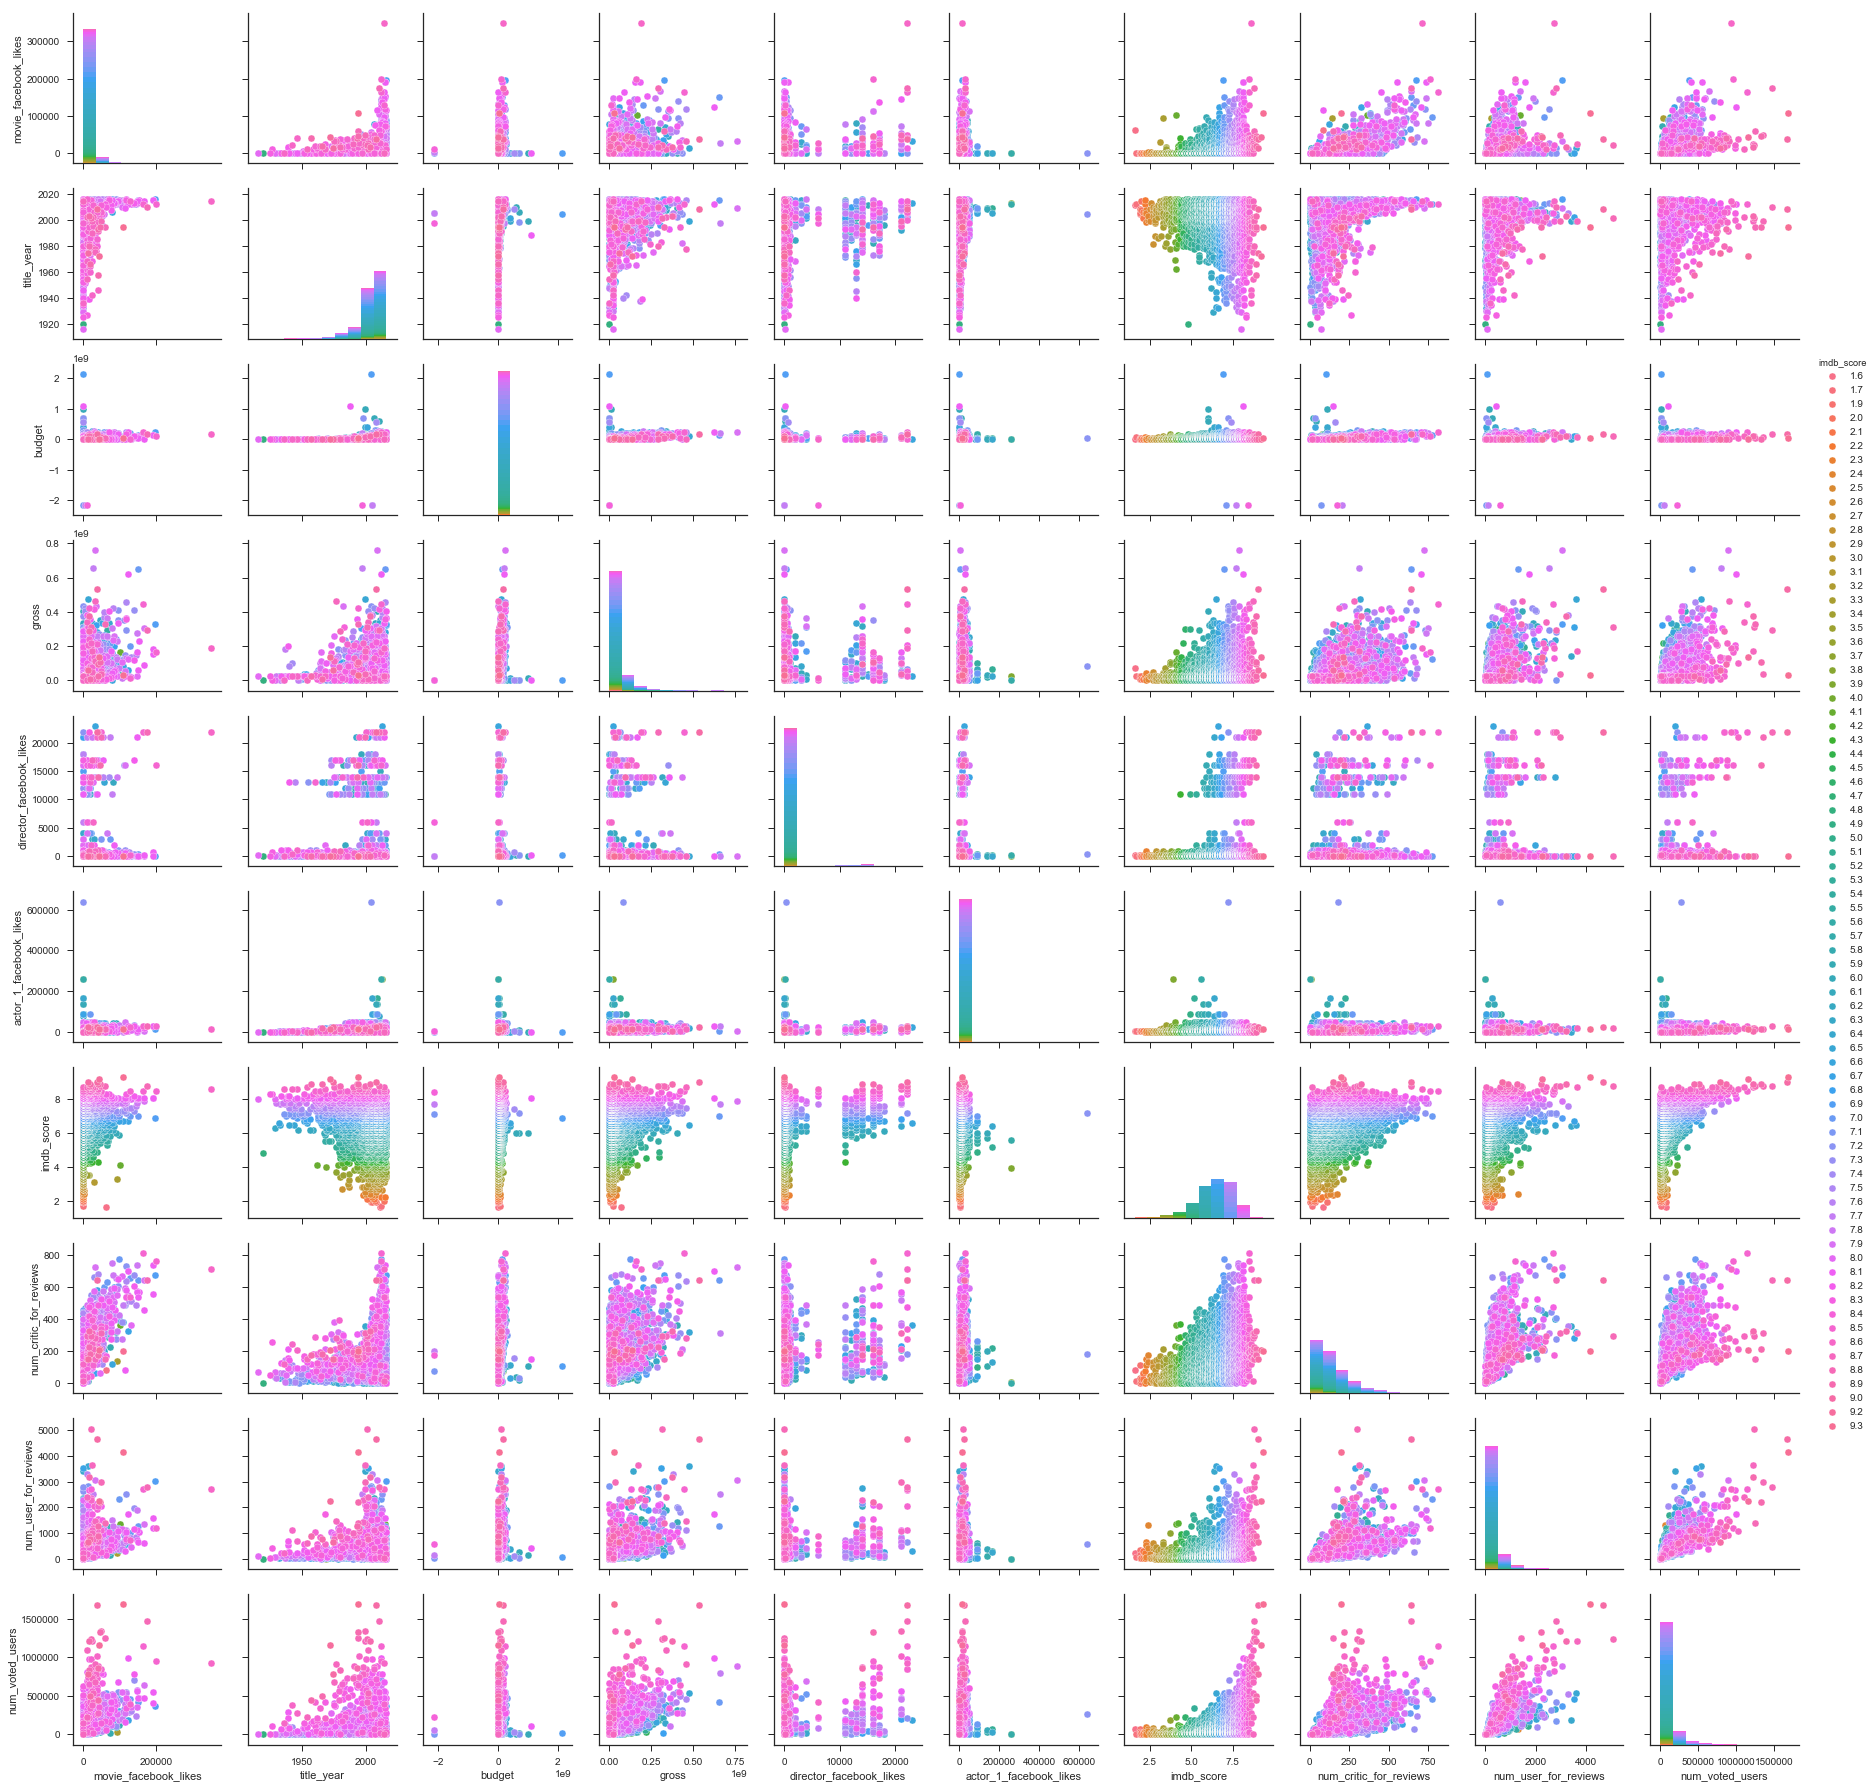

In [28]:
sns.set(style="ticks")
sns.pairplot(newdata, hue = "imdb_score", palette="husl")

##### Famous movie features clusters

In [29]:
data['actors_facebook_likes']=data['actor_1_facebook_likes']+data['actor_2_facebook_likes']+data['actor_3_facebook_likes']
kmeansdata= data[['movie_facebook_likes','num_user_for_reviews','num_critic_for_reviews','num_voted_users']]

In [30]:
## Choosing the best number of clusters from 2 to 13/ Best silhouette score for given data
n_clusters = list(range(2, 13))
scores = []
for i in n_clusters:
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(kmeansdata)
    results=model.labels_
    scores.append(silhouette_score(kmeansdata,results))

scores

[0.7916290666711893,
 0.7127015046184016,
 0.6789417360926422,
 0.63155935438623,
 0.6150785480655024,
 0.5980135809876367,
 0.573884788656048,
 0.5548289230033523,
 0.5389793699567049,
 0.5368197544829413,
 0.5260050942961583]

3 numbers of cluster seems to be reasonable with best silhouette score of 0.7127 and the score decreases thereafter with increase in number of clusters

In [31]:
#Kmeans cluster with n_clusters=3
model = KMeans(n_clusters=3,random_state=0)
model.fit(kmeansdata)
results=model.labels_
score=silhouette_score(kmeansdata,results)
results=pd.Series(data=results,index=data.index)
results=results.to_frame("clusters")
data=data.join(results)


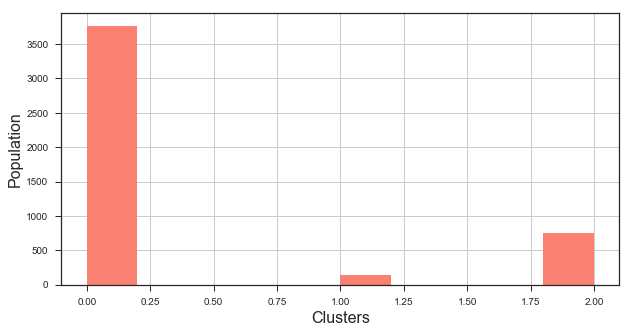

In [32]:
plt.ylabel('Population',fontsize=16)
plt.xlabel('Clusters',fontsize=16)
data['clusters'].hist(figsize=(10,5), color="salmon")
plt.show()

It is observed that the 1st cluster has most of the population concentrated

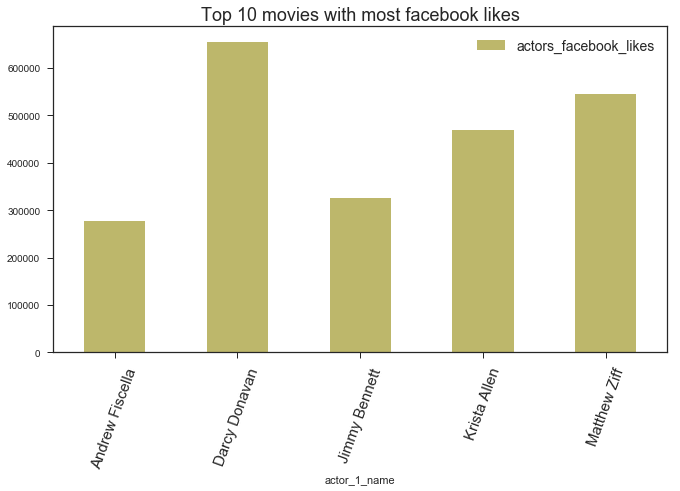

In [33]:
##Sort Actors based on facebook_likes and get top 10
sorted_fl=data.sort_values(by="actors_facebook_likes",ascending=False)
top10fl=sorted_fl.head(10)
top10fl[['actors_facebook_likes']].groupby(top10fl['actor_1_name']).sum().plot.bar(stacked=True,figsize=(11,6), color="darkkhaki")
plt.xticks(rotation=70,fontsize=15)
plt.legend(loc=0, prop={'size': 14})
plt.title('Top 10 movies with most facebook likes',fontsize=18)
plt.show()

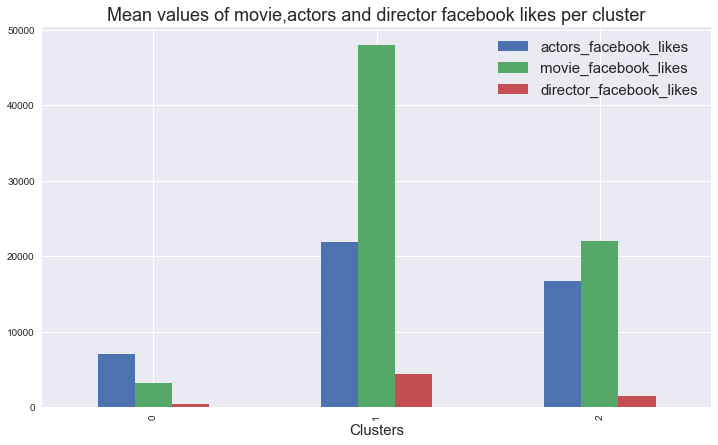

In [34]:
plt.style.use('seaborn')
data[['actors_facebook_likes','movie_facebook_likes','director_facebook_likes']].groupby(data['clusters']).mean().plot.bar(stacked=False,figsize=(12,7))
plt.xlabel('Clusters',fontsize=15)
plt.legend(loc=0, prop={'size': 15})
plt.title('Mean values of movie,actors and director facebook likes per cluster',fontsize=18)
plt.show()

It is observed that a movie can be liked by people if he/she likes the actor because movies cluster with most Facebook likes also has high average actors Facebook likes. 

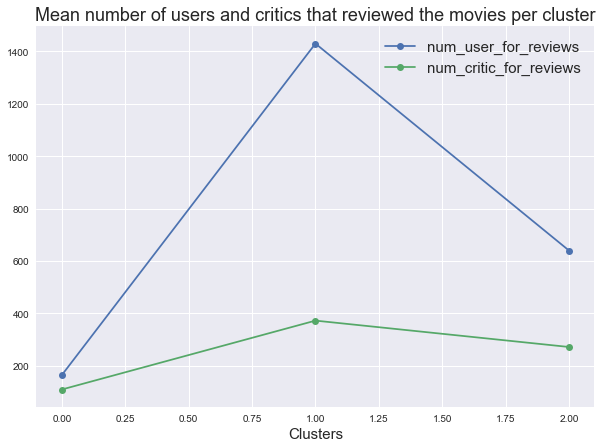

In [35]:
data[['num_user_for_reviews','num_critic_for_reviews']].groupby(data['clusters']).mean().plot.line(stacked=False,figsize=(10,7),marker='o')
plt.legend(loc=0, prop={'size': 15})
plt.xlabel('Clusters',fontsize=15)
plt.title('Mean number of users and critics that reviewed the movies per cluster',fontsize=18)
plt.show()

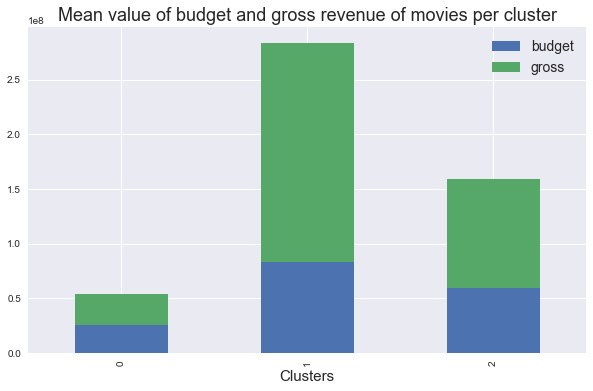

In [36]:
plt.style.use('seaborn')
data[['budget','gross']].groupby(data['clusters']).mean().plot.bar(stacked=True,figsize=(10,6))
plt.legend(loc=0, prop={'size': 14})
plt.xlabel('Clusters',fontsize=15)
plt.title('Mean value of budget and gross revenue of movies per cluster',fontsize=18)
plt.show()

Likes on Facebook influences financial success of each movie as budget is equal to gross revenue for cluster 0 where movies have a low number of Facebook likes.

# Model Evaluation to predict imdb scores

In [37]:
#Separating independent and dependent variables
x=data[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes','actors_facebook_likes',
        'num_critic_for_reviews','num_voted_users']]
y=data['imdb_score']


In [38]:
#Splitting data into train annd test data with 60:40 split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=13) 

### Using Ensemble Techniques 

## Decision Tree Model with Bagging

In [39]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=0)
bag_reg1 = BaggingRegressor(dt_reg, n_estimators=500, max_samples=200, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg1.fit(X_train, y_train)
y_pred1 = bag_reg1.predict(X_test)

In [40]:
print("r2_score : ",r2_score(y_test, y_pred1))

r2_score :  0.4273049306931843


In [41]:
print('Train score: {:.2f}'.format(bag_reg1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg1.score(X_test, y_test)))

Train score: 0.47
Test score: 0.43


In [42]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

In [43]:
report_table = [['DecTree with Bagging', r2_score(y_test, y_pred1) ]]
report_table

[['DecTree with Bagging', 0.4273049306931843]]

## Simple Linear regrssion

In [44]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

# Predicting the Test set results
y_linear_train_predict = lreg.predict(X_train)
y_linear_test_predict = lreg.predict(X_test)

0.2761543316772551
0.2991332257157232


In [45]:
print("r2_score : ",r2_score(y_test, y_linear_test_predict))

r2_score :  0.2991332257157232


In [46]:
report_table = report_table + [['Simple LinReg', r2_score(y_test, y_linear_test_predict) ]]
report_table

[['DecTree with Bagging', 0.4273049306931843],
 ['Simple LinReg', 0.2991332257157232]]

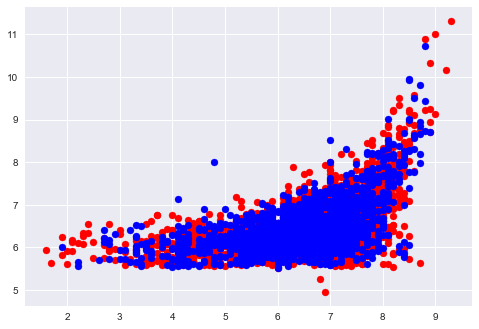

In [47]:
plt.scatter(y_train,y_linear_train_predict, c = 'r')
plt.scatter(y_test,y_linear_test_predict, c= 'b')

## Gradient Boosting Regressor

Gradient Boosting Regressor algorithm is used to create a model with the following parameters
Number of trees (weak learners) = 200
Function to minimize errors = Minimal squares
Learning rate , ie the rate at which the contribution of each tree is reduced= 3%
Maximum height of trees= 4

In [48]:
n_trees=150
gbr=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [49]:
pred=gbr.predict(X_test)
error=gbr.loss_(y_test,pred) ##Loss function== Mean square error
print("MSE:%.3f" % error)
print("r2_score : ",r2_score(y_test, pred))

MSE:0.630
r2_score :  0.4514654173443914


In [50]:
#report_table = report_table + [['GradiantBoosting', r2_score(y_test, pred) ]]
#report_table

In [51]:
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.5281263108822509
0.4514654173443914


In [52]:
test_error=[]
for i,pred in enumerate(gbr.staged_predict(X_test)):##staged_predict=predict at each stage 
    test_error.append(gbr.loss_(y_test,pred))##model.loss(y_test,pred)=mse(y_test,pred)

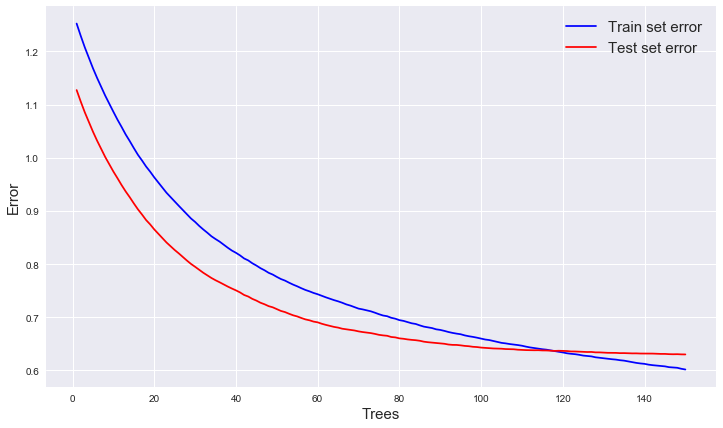

In [53]:
plt.figure(figsize=(12,7))
plt.plot(list(range(1,n_trees+1)),gbr.train_score_,'b-',label='Train set error') ## gbr.train_score_=deviance(=loss) of model at each stage
plt.plot(list(range(1,n_trees+1)),test_error,'r-',label='Test set error')
plt.legend(loc='upper right',fontsize=15)
plt.xlabel('Trees',fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.show()

It is observed that train and test set follows a similar behavior i.e. decreasing error with increase in number of trees. After 150 trees, the train error will continue to decrease while the test error remains stable indicating that model is overfitting to the train set at a later stage.

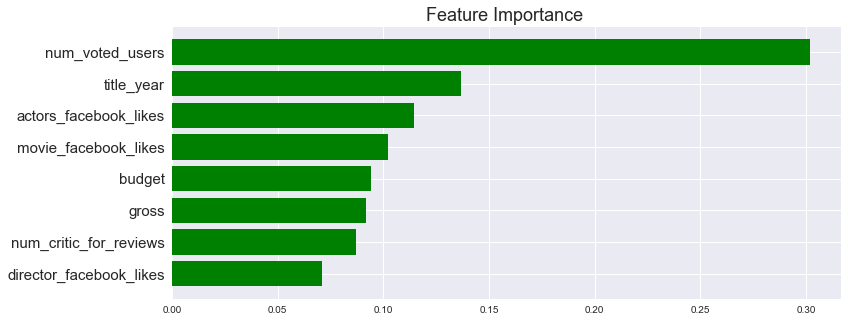

In [54]:
feature_importance=gbr.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos=np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center', color="green")
plt.yticks(pos, x.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

The feature importance graph indicates that num_voted_users play an important role in defining the imdb score. More the number of votes, high is the expected imdb score. Also, as title year increases, with time more number of people started voting and imdb score kept on increasing. Title year plays an important factor in determining imdb score.